##Task is to predict the life expectancy of countries, grouped by several parameters, using Linear Models.##



In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

import seaborn as sns; sns.set()
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('LifeExpectancyData.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None) 
df.columns=['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B',
       'Measles', 'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIVAIDS','GDP', 'Population', 'Thinness 10-19',
       'Thinness 5-9', 'Income Composition', 'Schooling']

df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Variables
Country- Country    
Year- Year    
Status- Developed or Developing status    
Life Expectancy- Age(years)   
Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)         
Infant Deaths- Number of Infant Deaths per 1000 population        
Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)  
Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)   
Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)   
Measles- number of reported measles cases per 1000 population    
BMI- Average Body Mass Index of entire population    
U-5 Deaths- Number of under-five deaths per 1000 population    
Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)    
Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)    
Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)      
HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)    
GDP- Gross Domestic Product per capita(in USD)   
Population- Population 
Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)    
Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)    
Income Composition- Human Development Index in terms of income composition of resources(0-1)  
Schooling- Number of years of Schooling  



In [5]:
df.shape

(2938, 22)

In [6]:
print(len(df))

2938


In [7]:
df.isnull().sum(axis=0)

Country                  0
Year                     0
Status                   0
Life Expectancy         10
Adult Mortality         10
Infant Deaths            0
Alcohol                194
Percent Expenditure      0
Hep B                  553
Measles                  0
BMI                     34
U-5 Deaths               0
Polio                   19
Total Expenditure      226
Diphtheria              19
HIVAIDS                  0
GDP                    448
Population             652
Thinness 10-19          34
Thinness 5-9            34
Income Composition     167
Schooling              163
dtype: int64

## Visualising missing data

AxesSubplot(0.125,0.125;0.698618x0.755)


,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


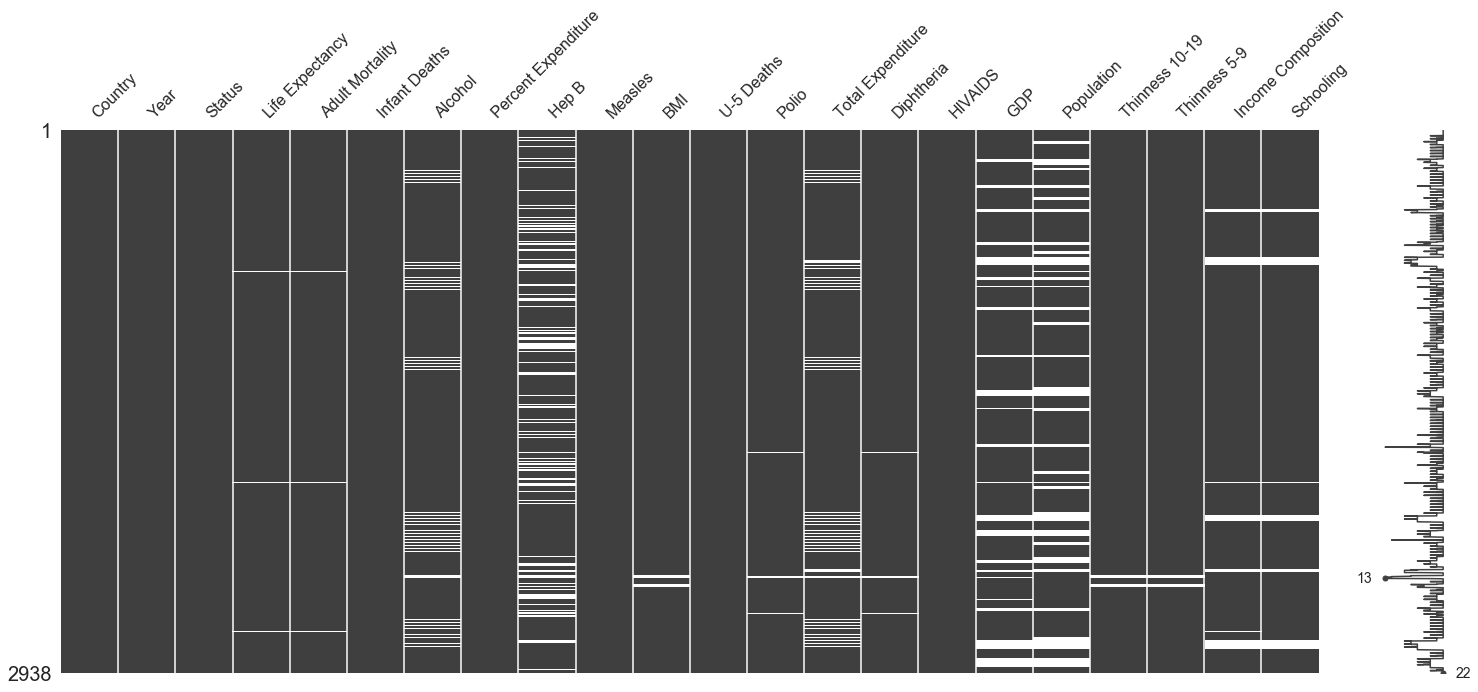

In [8]:
import missingno as msno
print(msno.matrix(df))
df.describe()

(2938, 22)
AxesSubplot(0.125,0.125;0.698618x0.755)


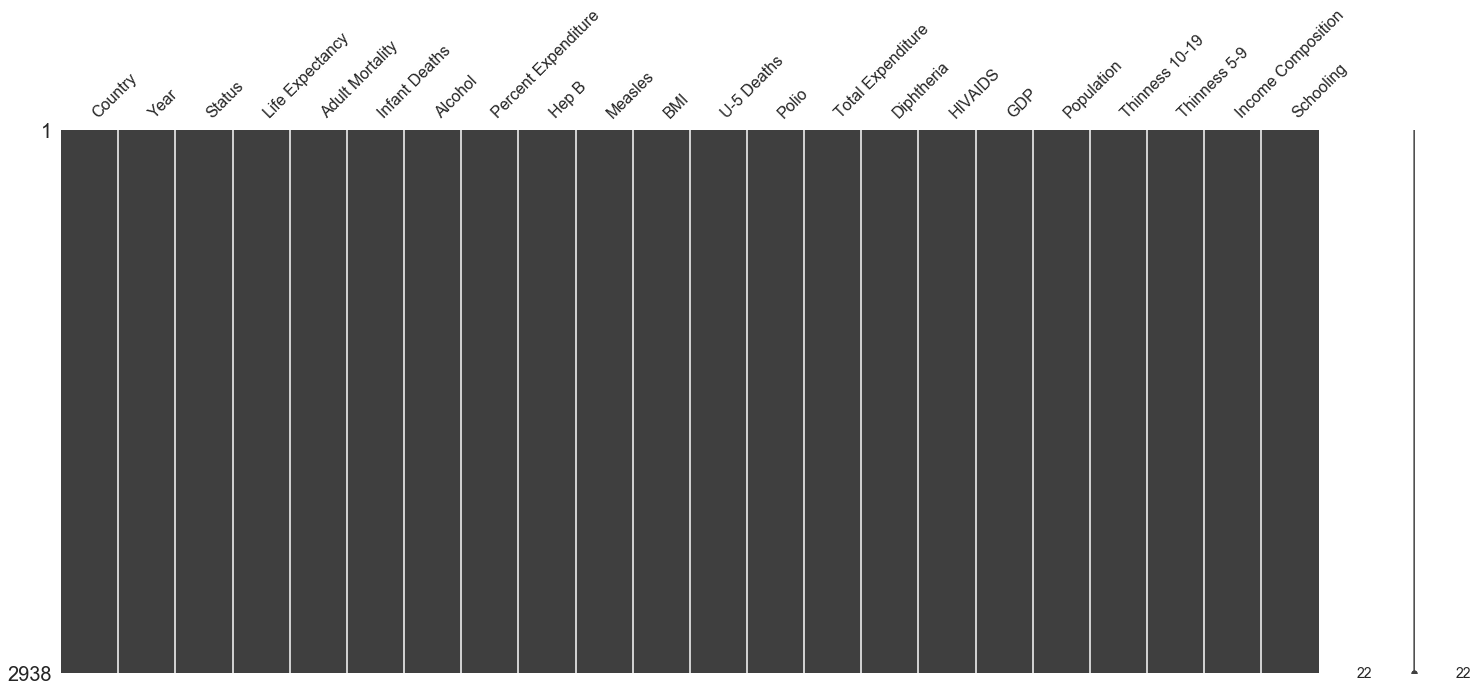

In [9]:
#Replace Missing Values Associated with Country Feature Mean
for column in df.columns:
    for i in range(len(df)): 
        country=df['Country'][i]
        status=df['Country'][i]
        if (df[column].isnull()[i]==True):
            df[column][i]=df[df['Country']==country][column].mean() 
        else:
             pass

#Fill Unresolved Values by Status
df1=df[(df['Status']=='Developed')].fillna(df[(df['Status']=='Developed')].mean())
df2=df[(df['Status']=='Developing')].fillna(df[(df['Status']=='Developing')].mean())
df=df2.append(df1)
print(df.shape)
print(msno.matrix(df))


In [10]:
df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
#Canada and France are mislabeled as Developing
df[df['Country']=='France']['Status'].replace('Developing','Developed')
df[df['Country']=='Canada']['Status'].replace('Developing','Developed')

496    Developed
497    Developed
498    Developed
499    Developed
500    Developed
501    Developed
502    Developed
503    Developed
504    Developed
505    Developed
506    Developed
507    Developed
508    Developed
509    Developed
510    Developed
511    Developed
Name: Status, dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2809
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              2938 non-null   object 
 1   Year                 2938 non-null   int64  
 2   Status               2938 non-null   object 
 3   Life Expectancy      2938 non-null   float64
 4   Adult Mortality      2938 non-null   float64
 5   Infant Deaths        2938 non-null   int64  
 6   Alcohol              2938 non-null   float64
 7   Percent Expenditure  2938 non-null   float64
 8   Hep B                2938 non-null   float64
 9   Measles              2938 non-null   int64  
 10  BMI                  2938 non-null   float64
 11  U-5 Deaths           2938 non-null   int64  
 12  Polio                2938 non-null   float64
 13  Total Expenditure    2938 non-null   float64
 14  Diphtheria           2938 non-null   float64
 15  HIVAIDS              2938 non-null   f

# EDA - Exploratory Data Analysis

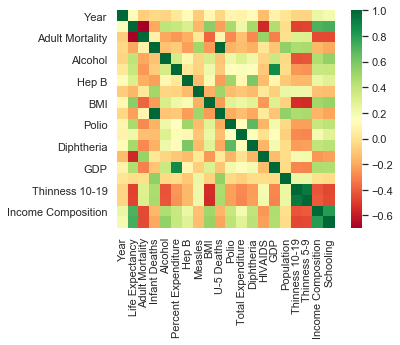

In [13]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [14]:
df.describe()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.217738,164.857839,30.303948,4.594394,738.251295,78.970357,2419.592240,38.287849,42.035739,82.396266,5.917162,82.183944,1.742103,7332.101801,1.278805e+07,4.848421,4.879169,0.629394,12.025459
std,4.613841,9.508437,124.084750,117.926501,4.028168,1987.914858,24.607214,11467.272489,19.930067,160.445548,23.476067,2.456024,23.743205,5.077785,13378.961185,5.383046e+07,4.395274,4.483454,0.207021,3.304714
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,0.930000,4.685343,73.500000,0.000000,19.400000,0.000000,78.000000,4.280000,78.000000,0.100000,562.082880,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,3.685000,64.912906,88.000000,17.000000,43.000000,4.000000,93.000000,5.710000,93.000000,0.100000,2834.764218,3.625718e+06,3.400000,3.400000,0.672000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,5433.356450,1.404546e+07,7.100000,7.200000,0.780000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Life Expectancy and QQ plots

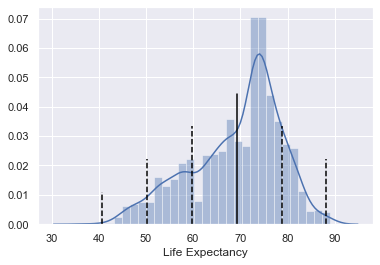

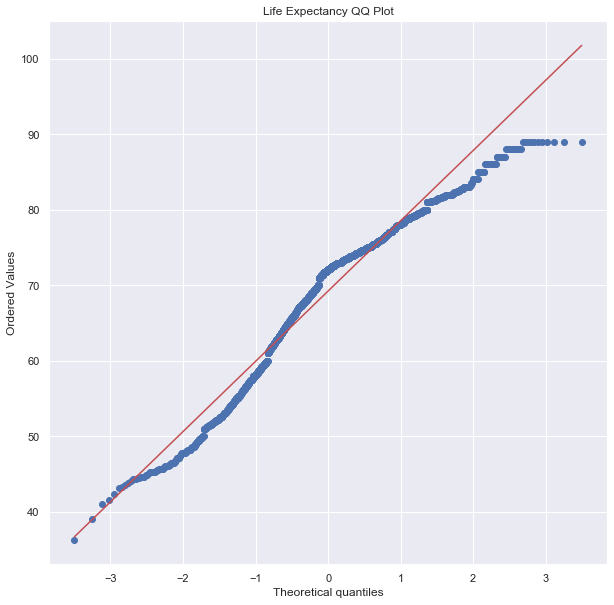

(0.9566084742546082, 9.622531605232346e-29)


In [15]:
#Life Expectancy 
sns.distplot(df['Life Expectancy'])
plt.axvline(df['Life Expectancy'].mean(),0,.6,color='black')
plt.axvline(df['Life Expectancy'].mean()+df['Life Expectancy'].std(),0,.45,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()-df['Life Expectancy'].std(),0,.45,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()+2*df['Life Expectancy'].std(),0,.30,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()-2*df['Life Expectancy'].std(),0,.30,color='black',linestyle='--')
plt.axvline(df['Life Expectancy'].mean()-3*df['Life Expectancy'].std(),0,.15,color='black',linestyle='--')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(df['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy QQ Plot')
plt.show()
print(stats.shapiro(df['Life Expectancy']))

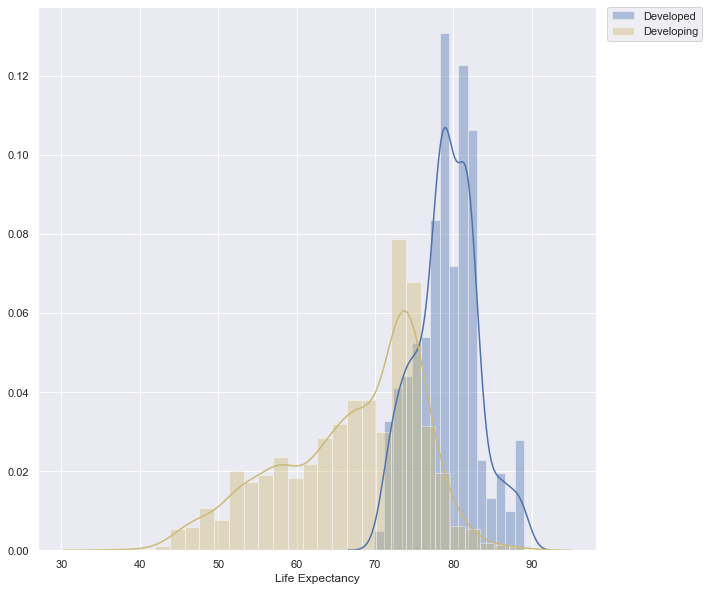

(0.9566084742546082, 9.622531605232346e-29)


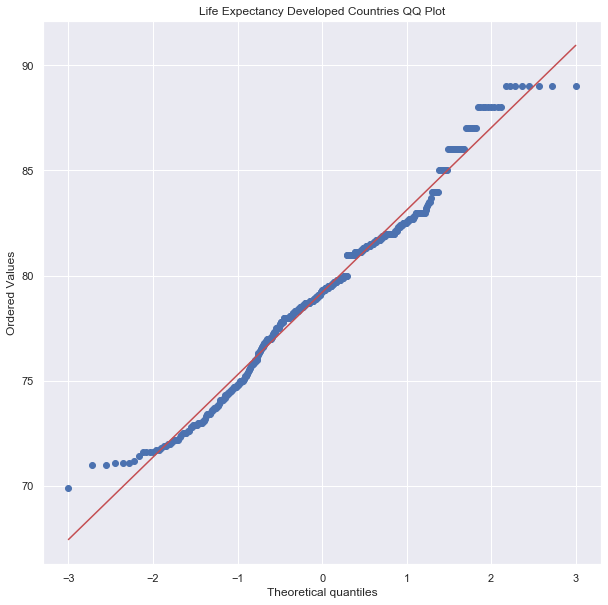

(0.9566084742546082, 9.622531605232346e-29)


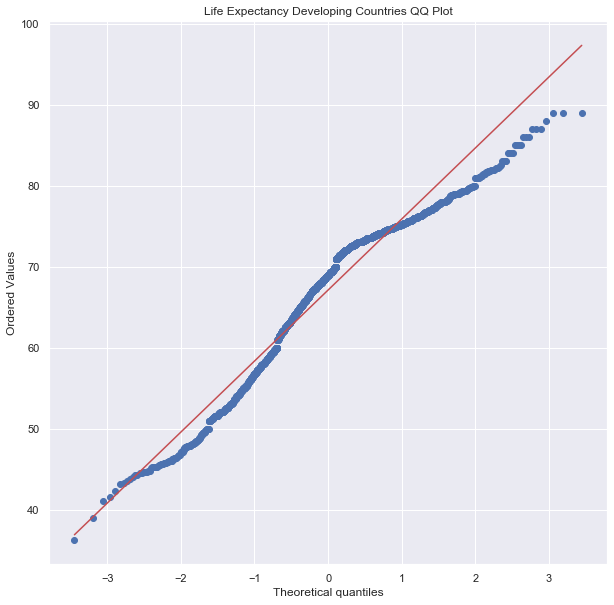

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Developed,512.0,79.197852,3.930942,69.9,76.8,79.25,81.7,89.0
Developing,2426.0,67.111465,8.987504,36.3,61.1,69.00,74.0,89.0


In [16]:
#Life Expectancy 
sns.distplot(df[df['Status']=='Developed']['Life Expectancy'])
sns.distplot(df[df['Status']=='Developing']['Life Expectancy'],color='y')
labels=['Developed','Developing']
plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#QQ plot   
stats.probplot(df[df['Status']=='Developed']['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy Developed Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()
#QQ plot   
stats.probplot(df[df['Status']=='Developing']['Life Expectancy'], dist="norm", plot=plt)
plt.title('Life Expectancy Developing Countries QQ Plot')
print(stats.shapiro(df['Life Expectancy']))
plt.show()

df['Life Expectancy'].groupby(df['Status']).describe()

# Life Expectancy Factor Plot

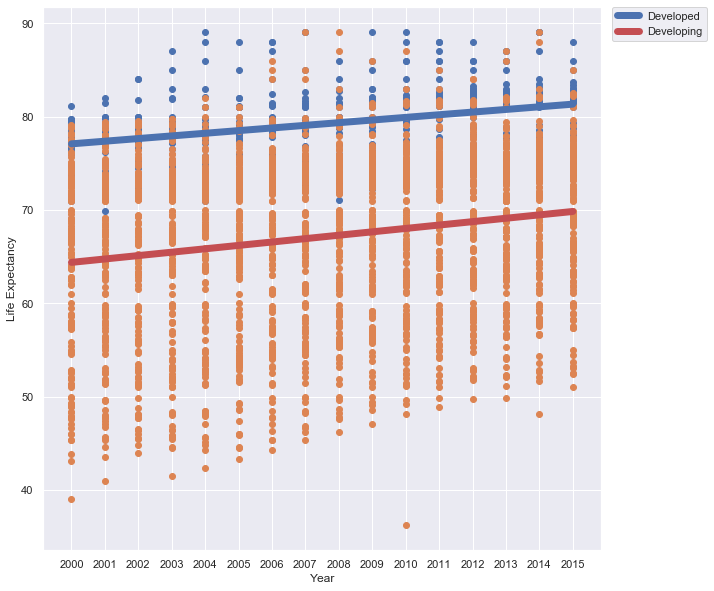

In [17]:
def LEfactorplot(column):
    x=df[df['Status']=='Developed'][column]
    y=df[df['Status']=='Developed']['Life Expectancy']
    x1=df[df['Status']=='Developing'][column]
    y1=df[df['Status']=='Developing']['Life Expectancy']
   
 #Fit Lines
    z1 =np.polyfit(x,y,1)
    z2 =np.polyfit(x1,y1,1)
    z1poly = np.poly1d(z1) 
    z2poly = np.poly1d(z2)

    #Plot
    plt.scatter(x,y,alpha=1)
    plt.scatter(x1,y1,alpha=1)
    plt.plot(x,z1poly(x),linewidth=7.0)
    plt.plot(x1,z2poly(x1),linewidth=7.0,color='r')
    labels=['Developed','Developing']
    plt.legend(labels=labels,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Life Expectancy')
    plt.xlabel(column)
LEfactorplot('Year')
plt.xticks(np.arange(2000,2016,1))
plt.show()

Correlation Values for the 193 countries left after Data Cleaning:


Life Expectancy  BMI                    0.560105
                 Diphtheria             0.483574
                 Polio                  0.470396
                 GDP                    0.455359
                 Alcohol                0.407103
                 Percent Expenditure    0.381990
                 Hep B                  0.314744
Year             Income Composition     0.233164
Life Expectancy  Total Expenditure      0.226319
Year             Schooling              0.200663
Life Expectancy  Year                   0.168709
                 Population            -0.022831
                 Measles               -0.157401
                 Infant Deaths         -0.196324
                 U-5 Deaths            -0.222286
                 HIVAIDS               -0.556165
                 Adult Mortality       -0.696386
dtype: float64

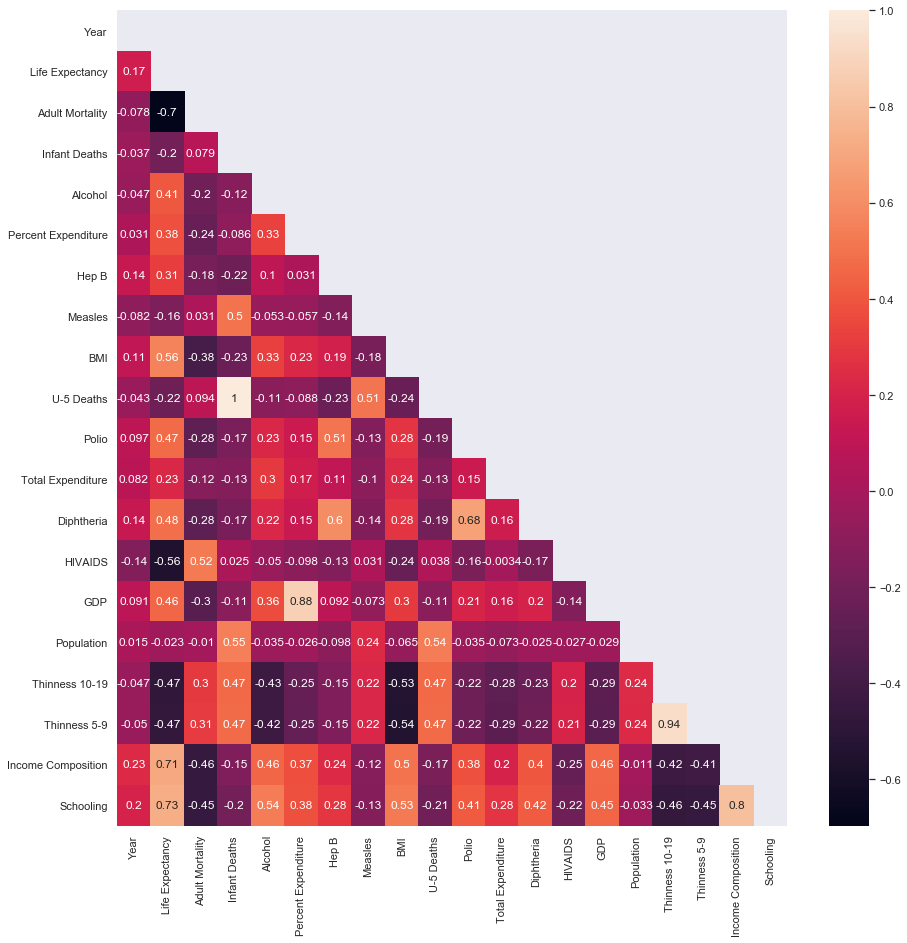

In [18]:
corrmat = df.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,mask=mask)
sol = (corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
                 .stack().sort_values(kind="quicksort",ascending=False))
LE=pd.Series(corrmat.unstack()[18:36]).sort_values(kind="quicksort",ascending=False)
print('Correlation Values for the {} countries left after Data Cleaning:'.format(len(df['Country'].unique())))
LE[1:18]

In [19]:
print('Top 10 Correlated Features Pairs:')
print(sol[0:10],'\n')
print('Bottom 10 Correlated Features Pairs:')
print(sol[143:153])

Top 10 Correlated Features Pairs:
Infant Deaths        U-5 Deaths            0.996629
Thinness 10-19       Thinness 5-9          0.939122
Percent Expenditure  GDP                   0.876259
Income Composition   Schooling             0.801269
Life Expectancy      Schooling             0.732084
                     Income Composition    0.708651
Polio                Diphtheria            0.676641
Hep B                Diphtheria            0.600456
Life Expectancy      BMI                   0.560105
Infant Deaths        Population            0.548775
dtype: float64 

Bottom 10 Correlated Features Pairs:
Infant Deaths    Polio           -0.169586
                 Diphtheria      -0.174236
Measles          BMI             -0.175786
Adult Mortality  Hep B           -0.184961
U-5 Deaths       Polio           -0.187721
                 Diphtheria      -0.194823
Infant Deaths    Schooling       -0.195264
Life Expectancy  Infant Deaths   -0.196324
Adult Mortality  Alcohol         -0.199832
U-5 D

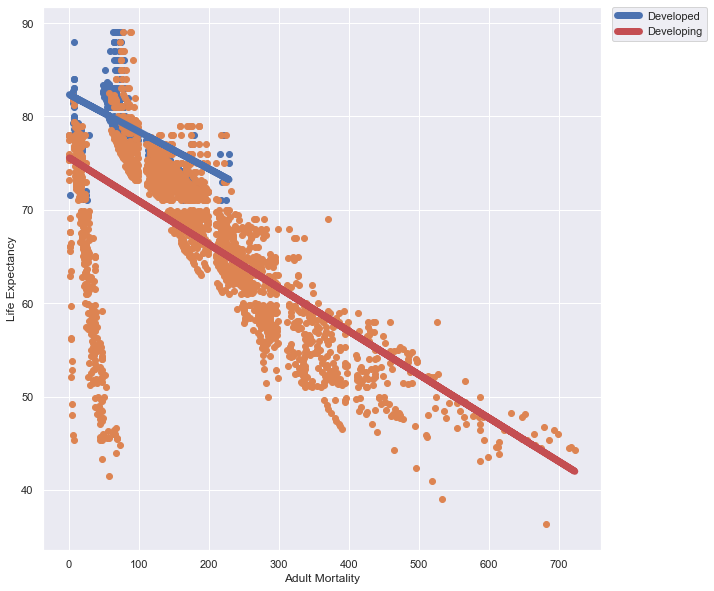

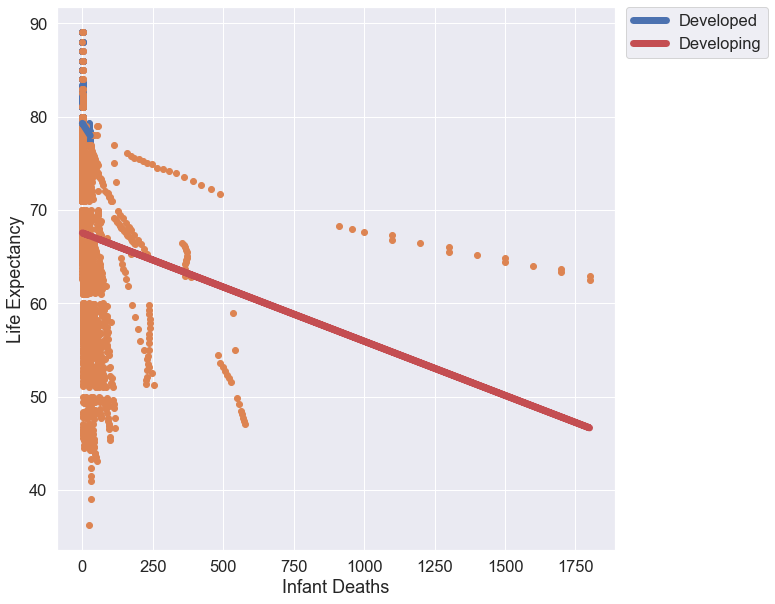

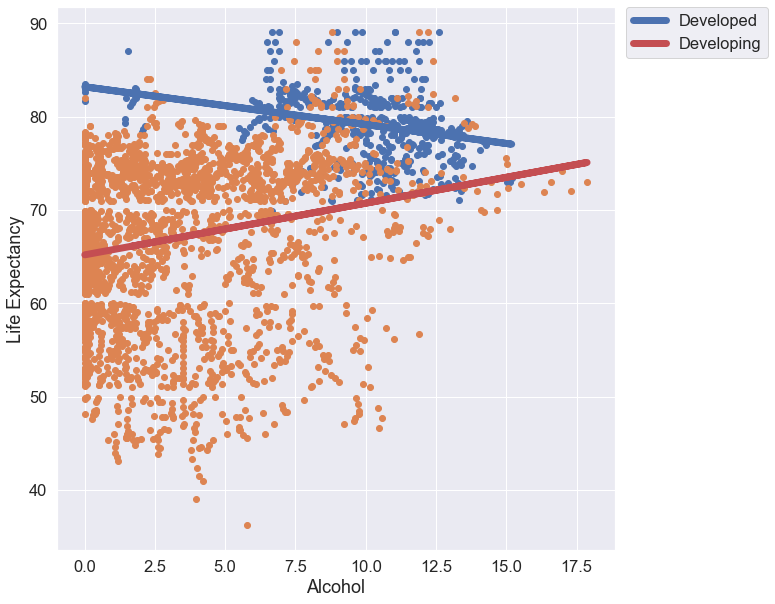

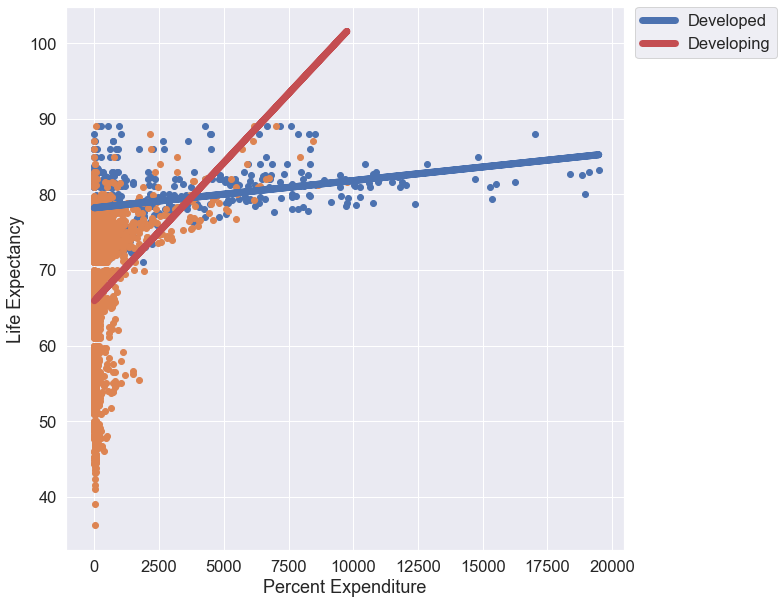

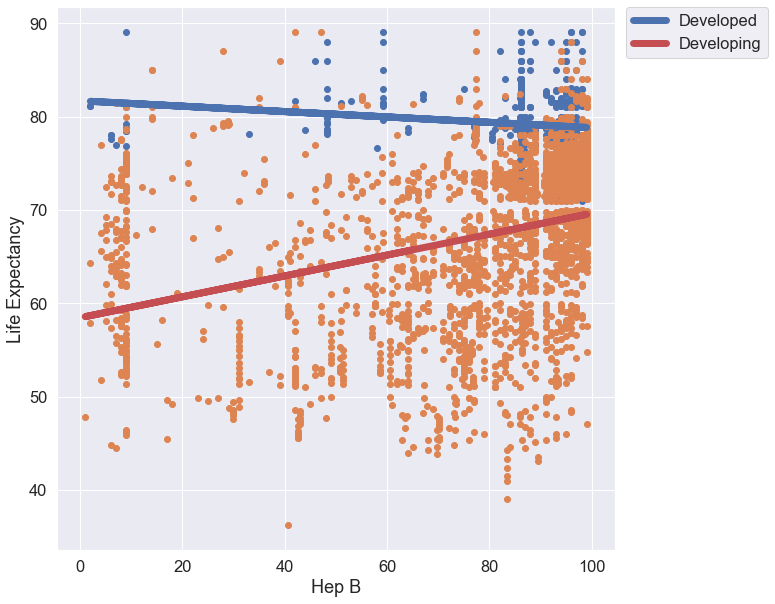

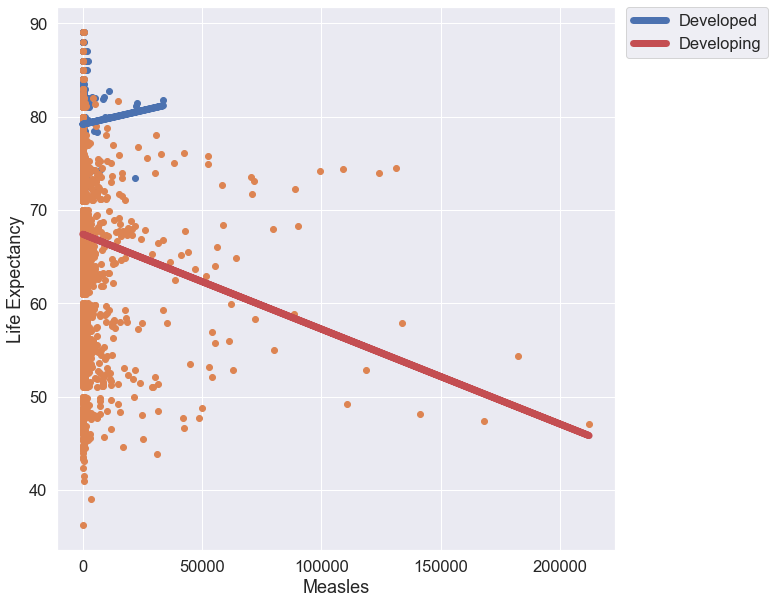

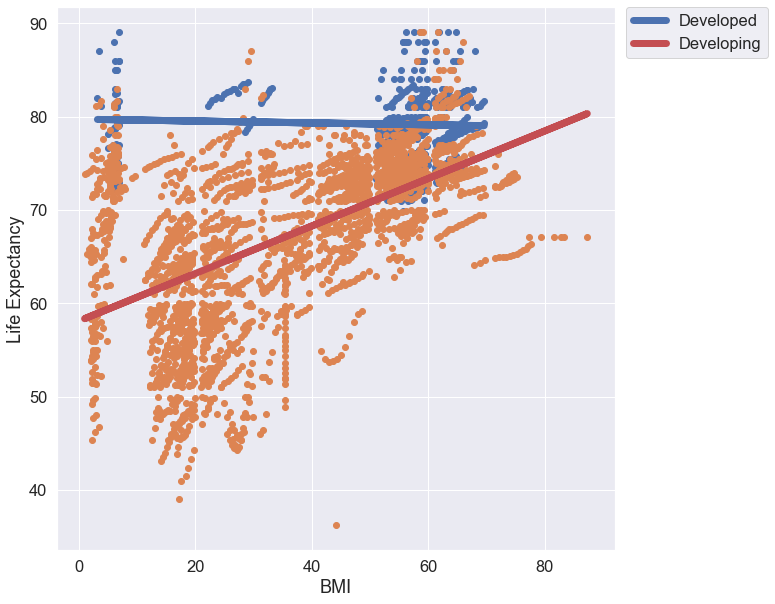

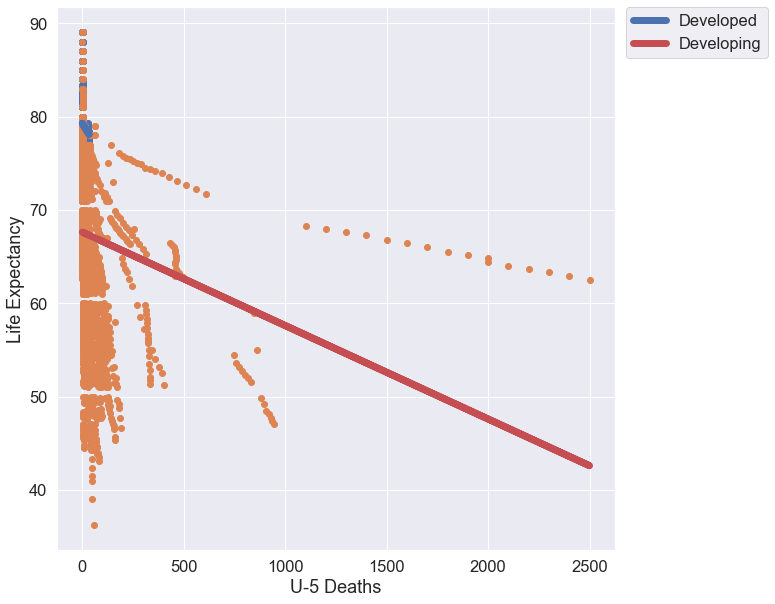

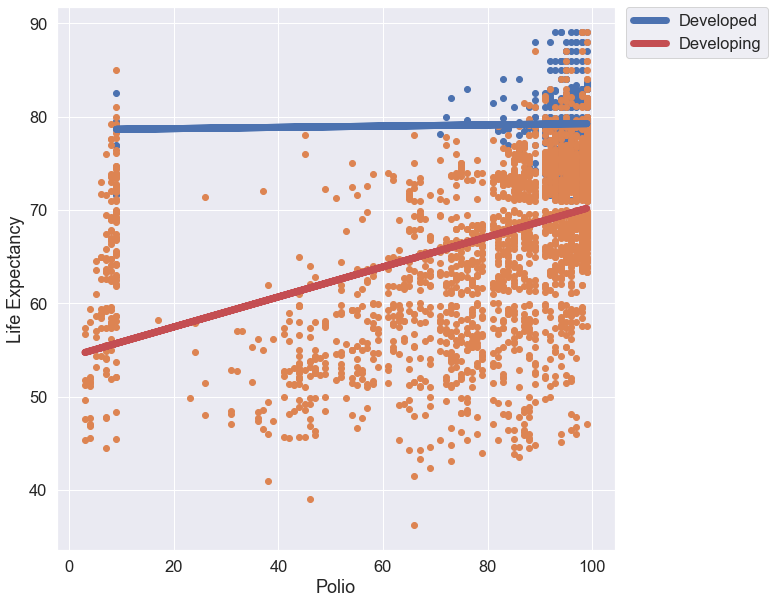

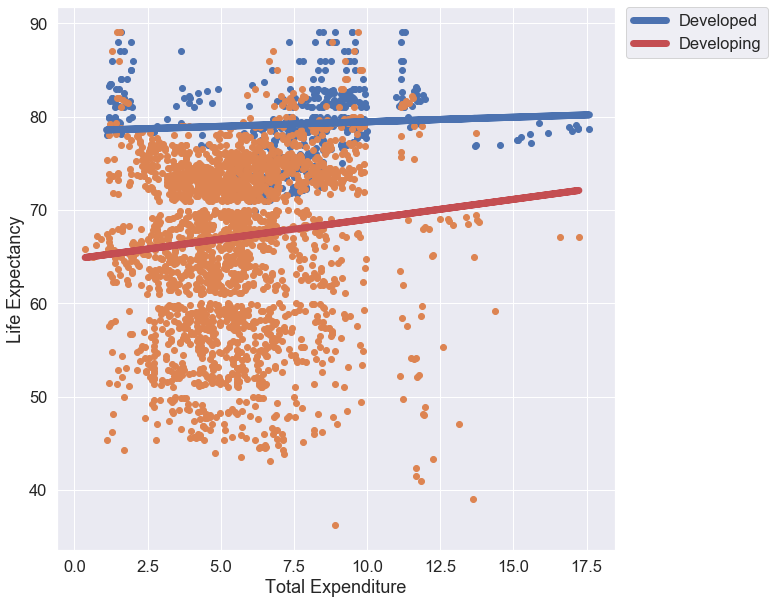

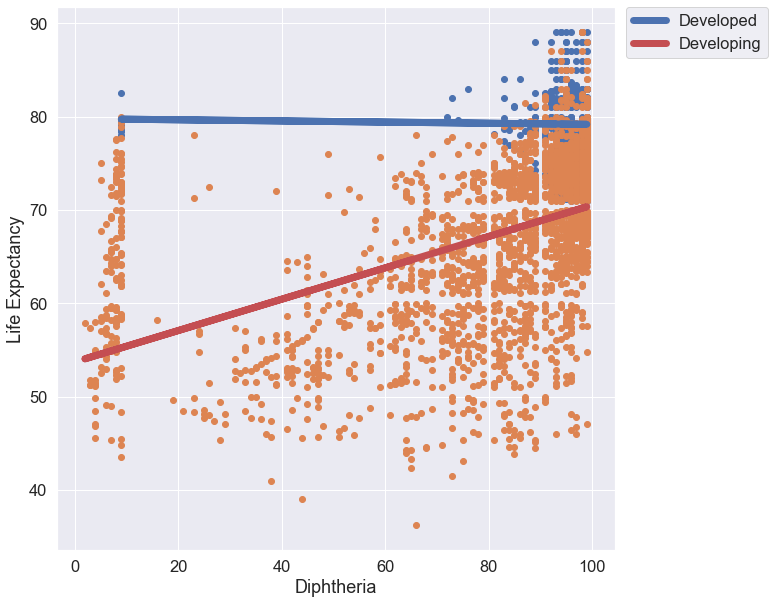

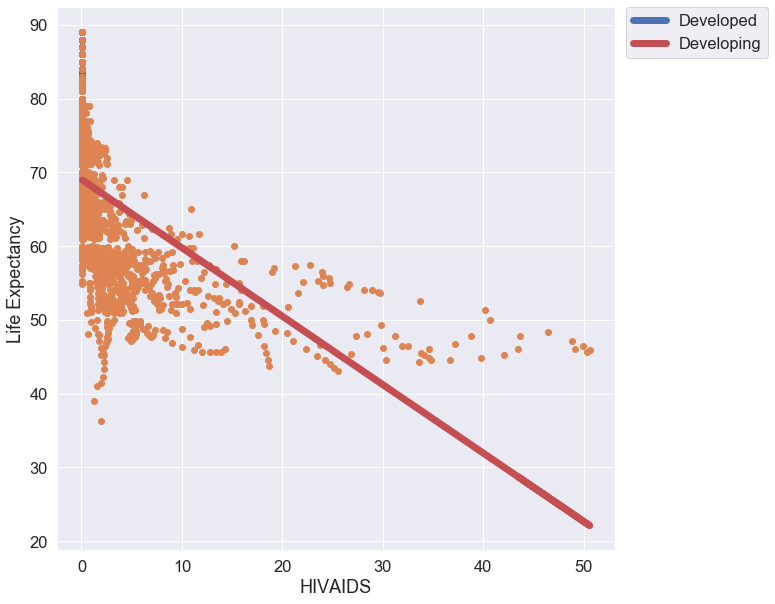

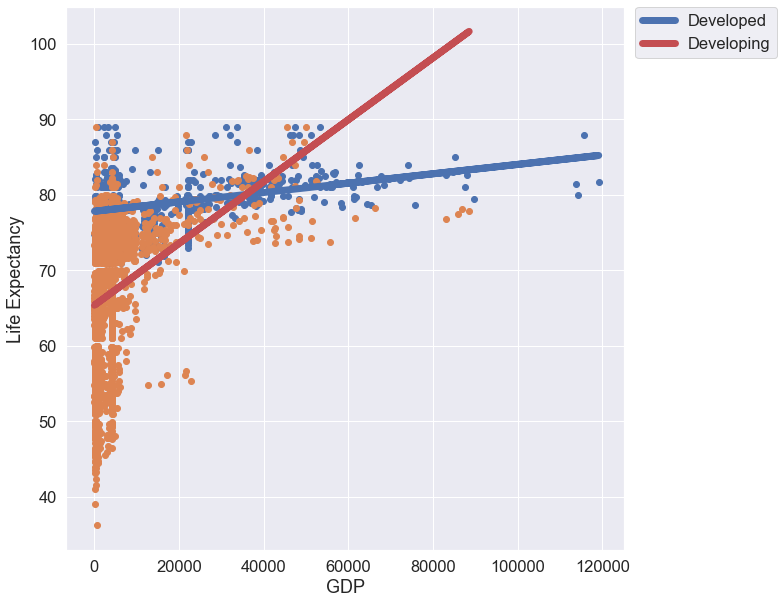

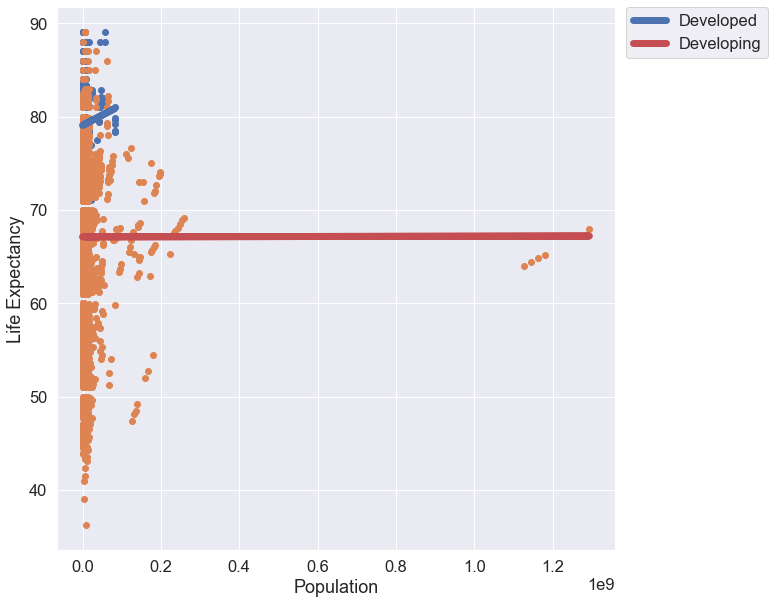

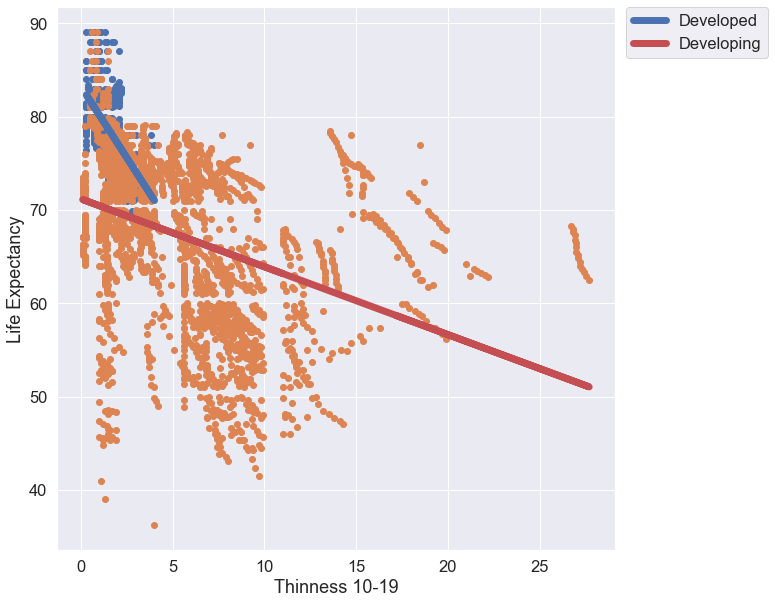

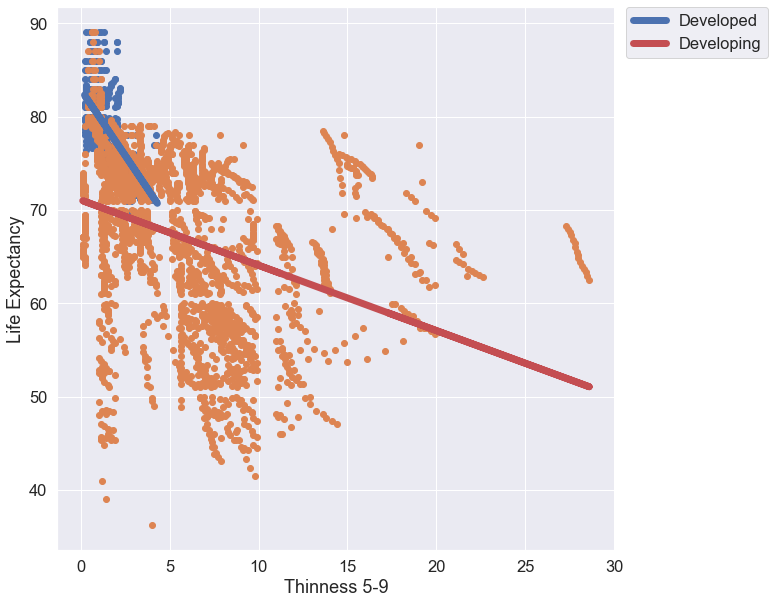

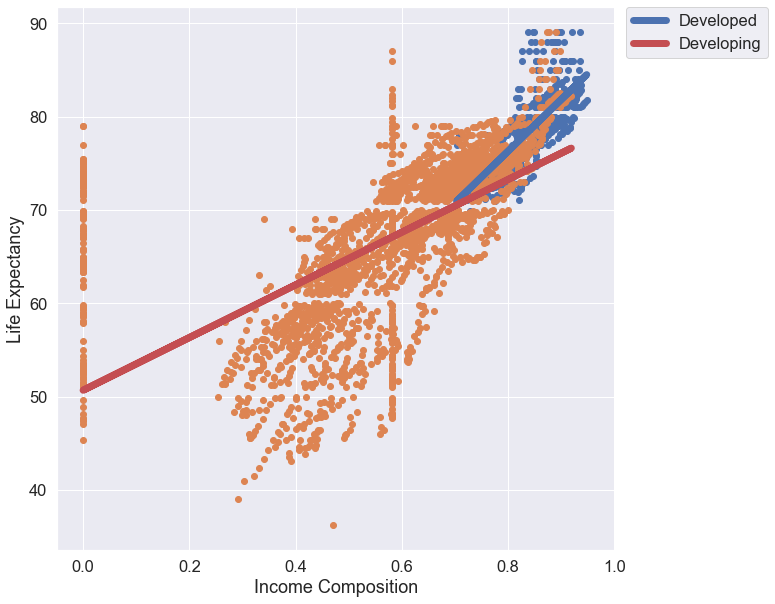

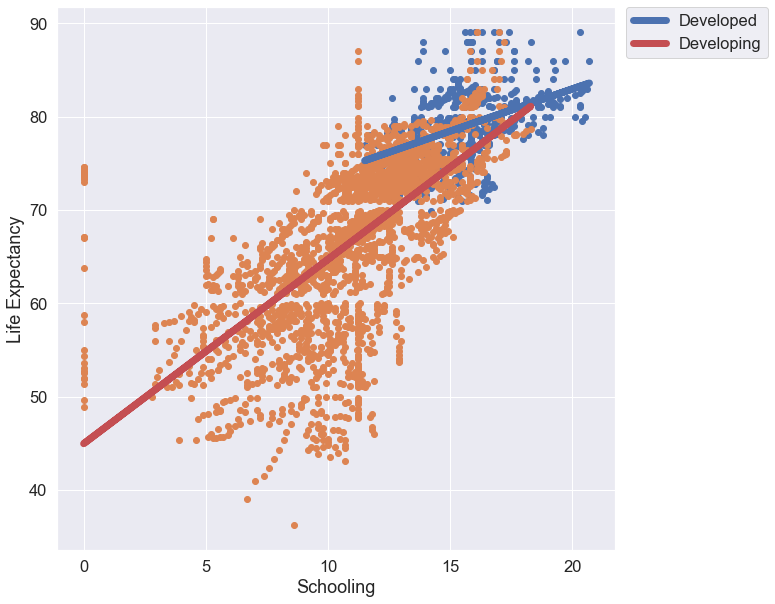

In [20]:
for column in df.columns:
    if (column=='Country')or(column=='Status')or(column=='Life Expectancy')or(column=='world')or(column=='Year'):
        pass
    else:
        LEfactorplot(column)
        sns.set(rc={'figure.figsize':(10,10)})
        sns.set(font_scale=1.5)
        plt.show()

In [21]:
#Encode Country and Create copy of dataframe for regression 
df_reg=df.copy()
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_reg["country_code"] = lb_make.fit_transform(df_reg["Country"])


#Binarize Status
df_reg['Status']=np.where(df_reg['Status']=='Developing',0,1)

df_reg.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percent Expenditure', 'Hep B', 'Measles',
       'BMI', 'U-5 Deaths', 'Polio', 'Total Expenditure', 'Diphtheria',
       'HIVAIDS', 'GDP', 'Population', 'Thinness 10-19', 'Thinness 5-9',
       'Income Composition', 'Schooling', 'country_code'],
      dtype='object')

In [22]:
df_reg.head(50)

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percent Expenditure,Hep B,Measles,BMI,U-5 Deaths,Polio,Total Expenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness 10-19,Thinness 5-9,Income Composition,Schooling,country_code
0,Afghanistan,2015,0,65.0,263.0,62,0.010000,71.279624,65.0,1154,19.1,83,6.0,8.160000,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014,0,59.9,271.0,64,0.010000,73.523582,62.0,492,18.6,86,58.0,8.180000,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,0,59.9,268.0,66,0.010000,73.219243,64.0,430,18.1,89,62.0,8.130000,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012,0,59.5,272.0,69,0.010000,78.184215,67.0,2787,17.6,93,67.0,8.520000,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,Afghanistan,2011,0,59.2,275.0,71,0.010000,7.097109,68.0,3013,17.2,97,68.0,7.870000,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
5,Afghanistan,2010,0,58.8,279.0,74,0.010000,79.679367,66.0,1989,16.7,102,66.0,9.200000,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0
6,Afghanistan,2009,0,58.6,281.0,77,0.010000,56.762217,63.0,2861,16.2,106,63.0,9.420000,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0
7,Afghanistan,2008,0,58.1,287.0,80,0.030000,25.873925,64.0,1599,15.7,110,64.0,8.330000,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0
8,Afghanistan,2007,0,57.5,295.0,82,0.020000,10.910156,63.0,1141,15.2,113,63.0,6.730000,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0
9,Afghanistan,2006,0,57.3,295.0,84,0.030000,17.171518,64.0,1990,14.7,116,58.0,7.430000,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0


In [23]:
#remove outliers
for col in df_reg.columns:
    if (col=='world')or (col=='Country'):
        pass
    else:
        df_reg=df_reg[np.abs(df_reg[col]-df_reg[col].mean())<=(3*df_reg[col].std())]

In [24]:
#Full Training Set
X_train=df_reg[df_reg['Year']<2011].drop('Life Expectancy',axis=1)
Y_train=df_reg[df_reg['Year']<2011]['Life Expectancy']

#Full Testing Set
X_test=df_reg[df_reg['Year']>2011].drop('Life Expectancy',axis=1)
Y_test=df_reg[df_reg['Year']>2011]['Life Expectancy']

#Full Set
X=df_reg.drop('Life Expectancy',axis=1)
Y=df_reg['Life Expectancy']

#Breakdown
Xlist=[X_train,X_test]
Ylist=[Y_train,Y_test]
xlist=['X_train','X_test']
status=['Full Training','Full Testing']

In [25]:
df_reg['Life Expectancy'].describe()

count    2063.000000
mean       70.365726
std         8.439897
min        41.000000
25%        65.500000
50%        72.700000
75%        75.800000
max        89.000000
Name: Life Expectancy, dtype: float64

# Linear Regression

Linear Regression X_train
X_train (1350, 18)
R^2 Score:0.8725
RMSE: 3.063
Minimum LE: 42.7
Maximum LE: 83.3
Average Predicted LE: 69.9
LE Standard Deviation: 8.012
LE Variance: 64.189


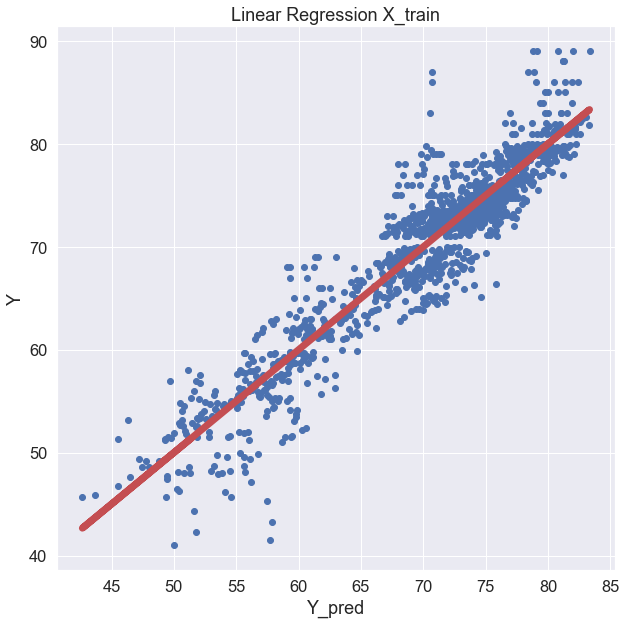

Linear Regression X_test
X_test (575, 18)
R^2 Score:0.8500
RMSE: 3.102
Minimum LE: 49.3
Maximum LE: 85.0
Average Predicted LE: 71.3
LE Standard Deviation: 7.384
LE Variance: 54.516


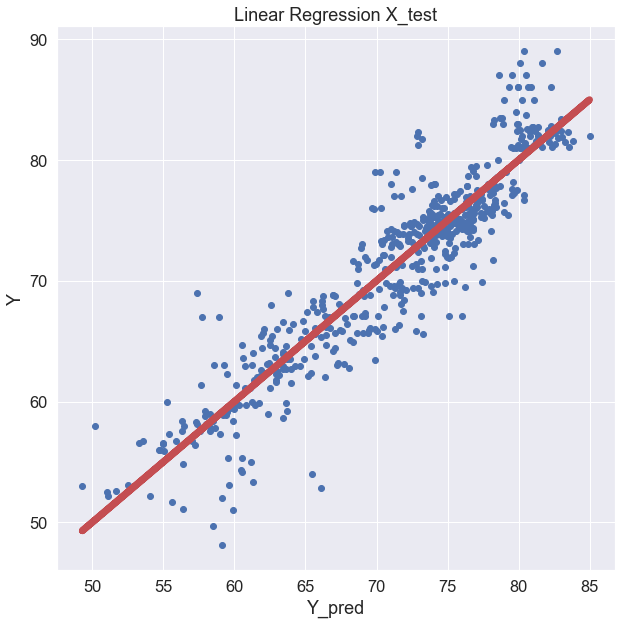

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from pylab import rcParams
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x=x.drop(['Country','Status','Infant Deaths','Thinness 10-19'],axis=1)
    x=scale(x)

    print('Linear Regression {}'.format(z))
    print(z,x.shape)
    #Model
    linear = LinearRegression()
    linear.fit(x,y)
        
    #R2 
    R=linear.score(x,y)
    print('R^2 Score:{:0.4f}'.format(R))

    #Predictions
    Y_pred=linear.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
    #plot
    z1=np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Linear Regression {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    rcParams['figure.figsize'] = 10, 10
    plt.show()
    
    if i==0:
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Linear']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)
    else:
         results.loc[i] = ['Linear',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]
        

        


# Theil Sen Regression



Thiel X_train
X_train (1350, 18)
R^2 Score:0.8652
RMSE: 3.150
Minimum LE: 43.0
Maximum LE: 83.2
Average Predicted LE: 70.0
LE Standard Deviation: 7.880
LE Variance: 62.101


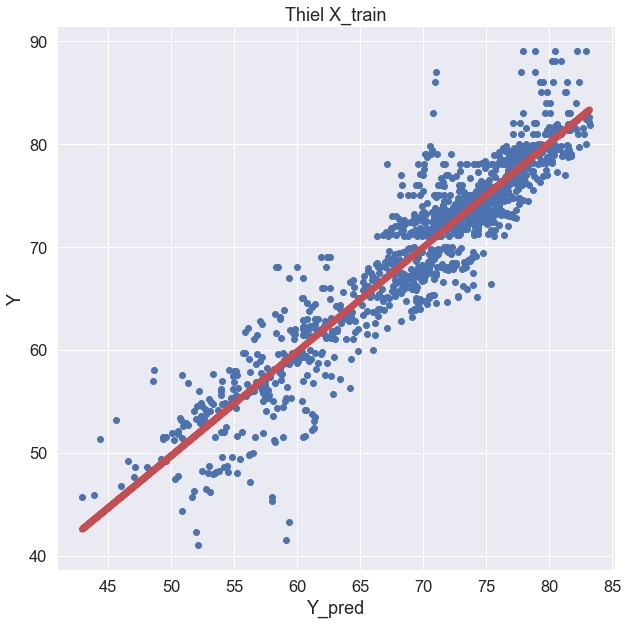

Thiel X_test
X_test (575, 18)
R^2 Score:0.8262
RMSE: 3.338
Minimum LE: 48.0
Maximum LE: 88.1
Average Predicted LE: 71.6
LE Standard Deviation: 7.666
LE Variance: 58.767


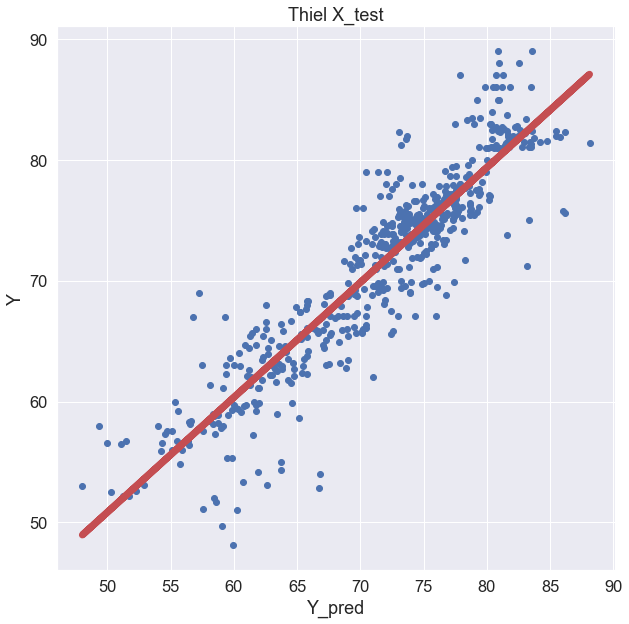

In [27]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.preprocessing import scale
from pylab import rcParams
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x=x.drop(['Country','Status','Infant Deaths','Thinness 10-19'],axis=1)
    x=scale(x)

    print('Thiel {}'.format(z))
    print(z,x.shape)
    #Model
    theil = TheilSenRegressor(random_state=52).fit(x,y)
        
    #R2 
    R=theil.score(x,y)
    print('R^2 Score:{:0.4f}'.format(R))

    #Predictions
    Y_pred=theil.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
    #plot
    z1=np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Thiel {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    rcParams['figure.figsize'] = 10, 10
    plt.show()

    
    if i==0:
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Thiel']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)
    else:
         results.loc[i] = ['Thiel',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]

# Ridge





In [28]:
from sklearn.model_selection import GridSearchCV

model =linear_model.Ridge()

para = {'alpha':[10,20,40,55,70,90]}
grid = GridSearchCV(model, para, cv = 3)
grid.fit(x, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [10, 20, 40, 55, 70, 90]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Now you find the best estimator for your fit

In [29]:
grid.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

And the highest attainable accuracy

In [30]:
grid.best_score_

0.7956970339436392

In [31]:
grid.best_params_

{'alpha': 10}

`Interpretation`: We have found the best parameters for our Ridge Model

Use the best alpha in your main model

Ridge X_train
X_train (1350, 20)
R^2 Score: 0.8741
RMSE: 3.043
Minimum LE: 42.8
Maximum LE: 83.5
Average Predicted LE: 69.9
LE Standard Deviation: 7.981
LE Variance: 63.693


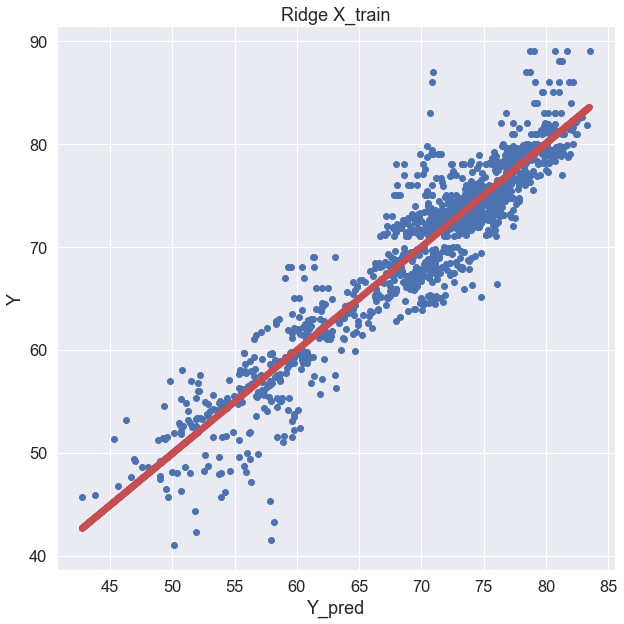

Ridge X_test
X_test (575, 20)
R^2 Score: 0.8505
RMSE: 3.096
Minimum LE: 49.3
Maximum LE: 85.1
Average Predicted LE: 71.3
LE Standard Deviation: 7.323
LE Variance: 53.629


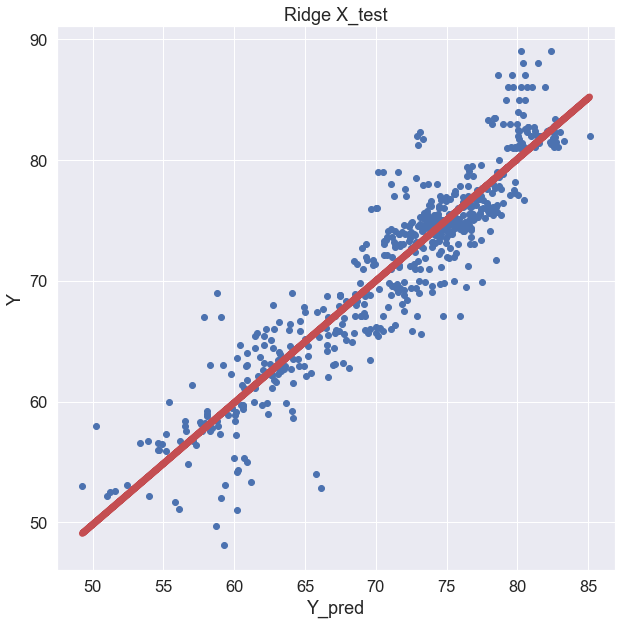

In [32]:
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x=x.drop(['Country','Status'],axis=1)
    x=scale(x)
    print('Ridge {}'.format(z))
    print(z,x.shape)
    #Model
    ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=True,solver='auto',random_state=65)
    ridge= ridgeregr.fit(x,y)

    #R2 
    R=ridge.score(x,y)
    print('R^2 Score: {:0.4f}'.format(R))

    #Predictions
    Y_pred=ridge.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
    
    #plot
    z1 =np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Ridge {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    plt.show()
    
    if i==0:
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Thiel']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)
    else:
         results.loc[i] = ['Ridge',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]
    
          

# Lasso

 

In [33]:
from sklearn.model_selection import GridSearchCV

model =linear_model.Lasso()

para = {'alpha':[0.01,0.015,0.02,0.025]}
grid = GridSearchCV(model, para, cv = 3)
grid.fit(x, y)



GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.015, 0.02, 0.025]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
grid.best_estimator_



Lasso(alpha=0.025, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
grid.best_score_



0.7994525563598893

In [36]:
grid.best_params_

{'alpha': 0.025}

`Interpretation`: The best parameters have been found and they will be used in the function

Lasso X_train
X_train (1350, 20)
R^2 Score: 0.8726
RMSE: 3.061
Minimum LE: 42.8
Maximum LE: 83.2
Average Predicted LE: 69.9
LE Standard Deviation: 7.967
LE Variance: 63.467


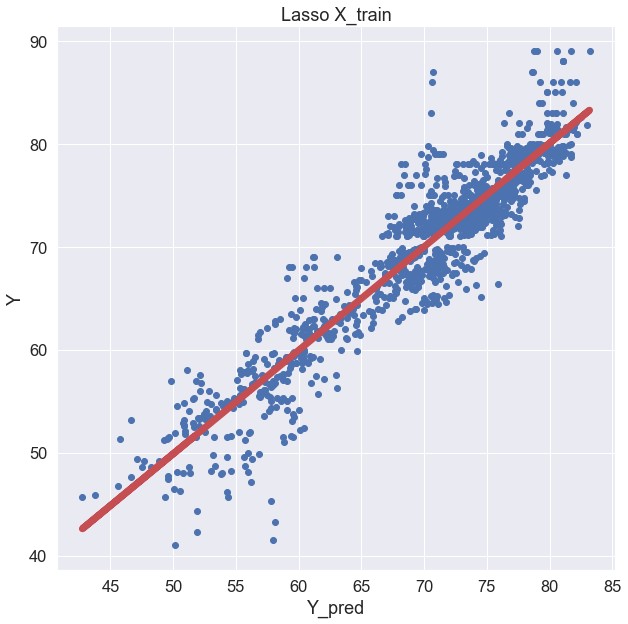

Lasso X_test
X_test (575, 20)
R^2 Score: 0.8505
RMSE: 3.097
Minimum LE: 49.4
Maximum LE: 84.7
Average Predicted LE: 71.3
LE Standard Deviation: 7.343
LE Variance: 53.919


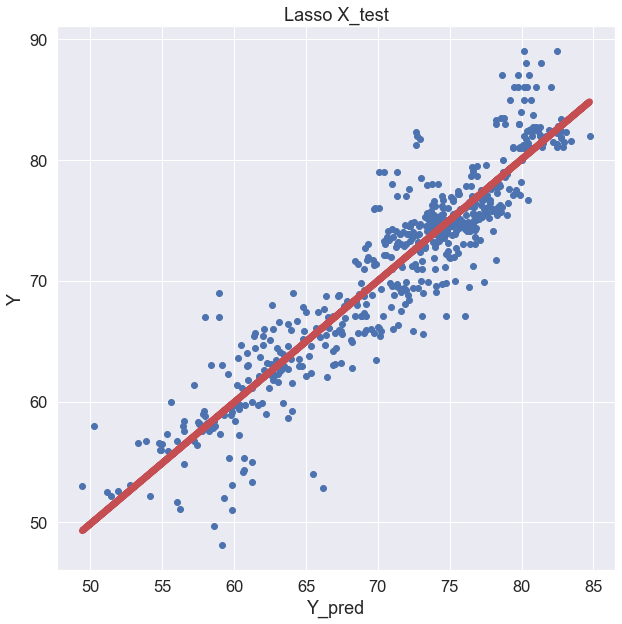

In [37]:

cols=['Year','AdultMortality', 'Infant Deaths','Alcohol', 'PercentExpenditure', 'Hep B', 'Measles', 'BMI', 'U5Deaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIVAIDS', 'Thinness1019',
       'Thinness59', 'IncomeComposition', 'Schooling','country_code']
feature_importances=pd.DataFrame(index=cols)
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x
    y
    x=x.drop(['Country','Status'],axis=1)
    x=scale(x)
    print('Lasso {}'.format(z))
    print(z,x.shape)
#Model
    rf = linear_model.Lasso(alpha=0.025, fit_intercept=True,random_state=65)
    rfc= rf.fit(x,y)

    #R2 
    R=rfc.score(x,y)
    print('R^2 Score: {:0.4f}'.format(R))

    #Predictions
    Y_pred=rf.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
    #plot
    z1 =np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Lasso {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    plt.show()
    if i==0:
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Thiel']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)
    else:
         results.loc[i] = ['Lasso',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]


# Gradient Boosting



In [38]:
from sklearn.model_selection import GridSearchCV
model = ensemble.GradientBoostingRegressor()
para = {'n_estimators':[50, 100, 150], 'max_depth':[1, 2, 3]}
grid = GridSearchCV(model, para, cv = 3)
grid.fit(x, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [39]:
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
grid.best_score_

0.8498477697384067

In [41]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 150}

Gradient Boosting X_train
X_train (1350, 20)
R^2 Score: 0.9677
RMSE: 1.540
Minimum LE: 42.9
Maximum LE: 86.2
Average Predicted LE: 69.9
LE Standard Deviation: 8.291
LE Variance: 68.733


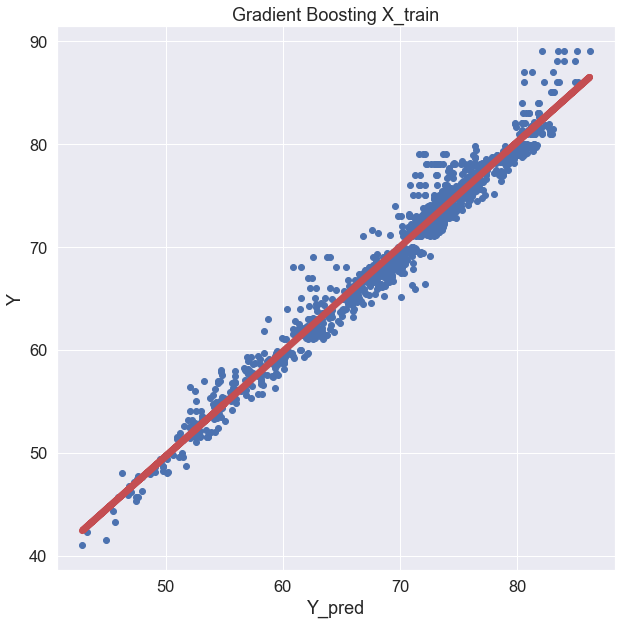

Top 5 Features
 IncomeComposition    55.21
TotalExpenditure     20.39
AdultMortality       13.31
Thinness59            2.44
BMI                   2.11
Name: X_train, dtype: float64 

Gradient Boosting X_test
X_test (575, 20)
R^2 Score: 0.9813
RMSE: 1.094
Minimum LE: 48.8
Maximum LE: 86.5
Average Predicted LE: 71.3
LE Standard Deviation: 7.809
LE Variance: 60.982


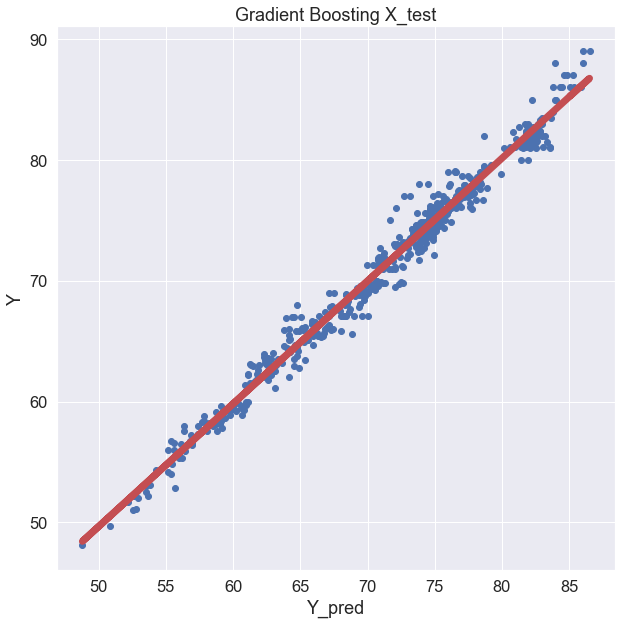

Top 5 Features
 IncomeComposition    38.91
TotalExpenditure     32.82
AdultMortality        9.87
Schooling             7.98
Thinness59            3.30
Name: X_test, dtype: float64 



In [42]:
cols=['Year','AdultMortality', 'Infant Deaths','Alcohol','Population','GDP', 'PercentExpenditure', 'Hep B', 'Measles', 'BMI', 'U5Deaths',
       'Polio', 'TotalExpenditure', 'Diphtheria', 'HIVAIDS', 'Thinness1019',
       'Thinness59', 'IncomeComposition', 'Schooling','country_code']
feature_importances=pd.DataFrame(index=cols)
for x,y,i,z,s in zip(Xlist,Ylist,range(len(Xlist)),xlist,status):
    x
    y
    x=x.drop(['Country','Status'],axis=1)
    x=scale(x)
    print('Gradient Boosting {}'.format(z))
    print(z,x.shape)
    #Model
    params = {'n_estimators':100,'max_depth': 3}
    rf = ensemble.GradientBoostingRegressor(**params)
    rfc= rf.fit(x,y)

    #R2 
    R=rfc.score(x,y)
    print('R^2 Score: {:0.4f}'.format(R))

    #Predictions
    Y_pred=rf.predict(x)
    RMSE=mean_squared_error(y, Y_pred)**0.5
    print('RMSE: {:0.3f}'.format(RMSE))
    print('Minimum LE: {:0.1f}'.format(Y_pred.min()))
    print('Maximum LE: {:0.1f}'.format(Y_pred.max()))
    print('Average Predicted LE: {:0.1f}'.format(Y_pred.mean()))
    print('LE Standard Deviation: {:0.3f}'.format(Y_pred.std()))
    print('LE Variance: {:0.3f}'.format(Y_pred.std()**2))
        
    #plot
    z1 =np.polyfit(Y_pred,y,1)
    z1poly = np.poly1d(z1) 
    plt.scatter(Y_pred,y,alpha=1)
    plt.plot(Y_pred,z1poly(Y_pred),linewidth=7.0,color='r')
    plt.title('Gradient Boosting {}'.format(z))
    plt.xlabel('Y_pred')
    plt.ylabel('Y')
    plt.show()
    
    #Feature Importance
    feature_importances[z]=(rfc.feature_importances_*100).round(2)
    print('Top 5 Features\n',feature_importances[z].nlargest(5).round(2),'\n')
        
    if i==0:
        #Result DataFrame
        results = pd.DataFrame()
        results["Method"]=['Thiel']
        results['Set']=z
        results['Status']=s
        results['Datapoint Count']=x.shape[0]*x.shape[1]
        results["RMSE"] = RMSE.round(2)
        results["R^2"] = R.round(2)
        results['LE Min']=Y_pred.min().round(1)
        results['LE Max']=Y_pred.max().round(1)
        results['Average LE']=Y_pred.mean().round(1)
        results['LE Std']=Y_pred.std().round(2)
        results['LE Var']=(Y_pred.std()**2).round(1)
    else:
         results.loc[i] = ['Gradient Boosting',z,s,x.shape[0]*x.shape[1]
                          ,RMSE.round(3)
                          ,R.round(4)
                          ,Y_pred.min().round(1)
                          ,Y_pred.max().round(1)
                          ,Y_pred.mean().round(1)
                          ,Y_pred.std().round(3)
                          ,(Y_pred.std()**2).round(3)]

        


In [43]:
feature_importances

,X_train,X_test
Year,0.05,0.04
AdultMortality,13.31,9.87
Infant Deaths,0.34,0.22
Alcohol,0.66,1.05
Population,0.28,0.01
GDP,0.02,0.16
PercentExpenditure,0.11,0.34
Hep B,1.19,0.39
Measles,1.75,0.62
BMI,2.11,0.50


In [44]:
results

,Method,Set,Status,Datapoint Count,RMSE,R^2,LE Min,LE Max,Average LE,LE Std,LE Var
0,Thiel,X_train,Full Training,27000,1.540,0.9700,42.9,86.2,69.9,8.290,68.700
1,Gradient Boosting,X_test,Full Testing,11500,1.094,0.9813,48.8,86.5,71.3,7.809,60.982


`Interpretation`: This shows the most efficient model

In [45]:
regsum=results.groupby(['Status','Method']).mean()
regsum

,,Datapoint Count,RMSE,R^2,LE Min,LE Max,Average LE,LE Std,LE Var
Status,Method,,,,,,,,
Full Testing,Gradient Boosting,11500,1.094,0.9813,48.8,86.5,71.3,7.809,60.982
Full Training,Thiel,27000,1.540,0.9700,42.9,86.2,69.9,8.290,68.700


# Conclusion

Top 5 Average Life Performance Predictors across all the model are Income Composition,Adult Mortality,HIV_AIDS, Schooling, and Thinness 5-9. Life Expectancy ranges are Developed(70-89), Developing (41-86), 1st World(78-88), 2nd World(65-78),3rd World(41-65). 
 

The developed and developing status don’t fully cover the different categories of countries.Testing data was generally higher across all groupings due to the year raising LE inherently. In fact, there was a .3 increase every year in Life Expectancy from the models. 

Disease and hunger relief are an universal key to improving life expectancy. This can come in the form of just being smarter and preventing outbreaks by vacinating. This is helpful when traveling to other countries to keep it away from unknowing populations. 

Alcohol is negatively correlated with life expectancy for developed countries and 1st world countries while being positively correlated with 2nd, 3rd, and Developing Countries. In this case, it means that population is living longer, but alcohol consumption is not increasing life expectancy! 



